## CSC 8515 - Machine Learning Project  
**Topic: Predicting success in rehabilitation  
Author: James Fung  **

In [63]:
#General.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#One hot encoder.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Split methods.
from sklearn.model_selection import train_test_split

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA

#Seaborn.
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 14,10

#Statistial packages.
from scipy.stats import chi2_contingency

from sklearn import metrics

from collections import Counter

## Import Data, Feature Exploration

In [2]:
#Import the rehab file as a pandas file.

#Read the data.
rehab = pd.read_csv('Rehab.csv', header=0)

In [3]:
#Quick look at the data.
rehab.head()

,Unnamed: 0,CASEID,DISYR,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,ALCDRUG,DSMCRIT,PSYPROB,HLTHINS,PRIMPAY
0,1,2.014000e+10,2014,18-20,MALE,WHITE,NOT OF HISPANIC ORIGIN,NEVER MARRIED,9-11,UNEMPLOYED,...,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,OTHER DRUGS ONLY,CANNABIS DEPENDENCE,YES,NONE,OTHER GOVERNMENT PAYMENTS
1,2,2.014000e+10,2014,50-54,MALE,WHITE,NOT OF HISPANIC ORIGIN,SEPARATED,12,UNEMPLOYED,...,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,ALCOHOL ONLY,ALCOHOL DEPENDENCE,NO,MISSING/UNKNOWN/NOT COLLECTED/INVALID,MISSING/UNKNOWN/NOT COLLECTED/INVALID
2,3,2.014000e+10,2014,21-24,FEMALE,WHITE,NOT OF HISPANIC ORIGIN,NEVER MARRIED,12,UNEMPLOYED,...,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,OTHER DRUGS ONLY,OTHER SUBSTANCE DEPENDENCE,NO,NONE,"NO CHARGE (FREE, CHARITY, SPECIAL RESEARCH, TE..."
3,4,2.014000e+10,2014,50-54,MALE,WHITE,NOT OF HISPANIC ORIGIN,"DIVORCED, WIDOWED",12,UNEMPLOYED,...,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,OTHER DRUGS ONLY,MISSING/UNKNOWN/NOT COLLECTED/INVALID,NO,MISSING/UNKNOWN/NOT COLLECTED/INVALID,MEDICAID
4,5,2.014000e+10,2014,25-29,MALE,WHITE,NOT OF HISPANIC ORIGIN,NEVER MARRIED,12,NOT IN LABOR FORCE,...,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,SUBSTANCE NOT REPORTED,OTHER DRUGS ONLY,OTHER SUBSTANCE DEPENDENCE,NO,NONE,OTHER


In [4]:
#Drop the first three columns as they provide no information. Also drop some "FLG" columns, as they are nearly uniform.
rehabclean = rehab.drop(['Unnamed: 0','CASEID','DISYR','METHFLG','PCPFLG','HALLFLG','AMPHFLG','STIMFLG','TRNQFLG','BARBFLG','SEDHPFLG','INHFLG','OTCFLG'],1)

In [5]:
#What are the column names?
print(rehabclean.columns)

Index(['AGE', 'GENDER', 'RACE', 'ETHNIC', 'MARSTAT', 'EDUC', 'EMPLOY',
       'DETNLF', 'PREG', 'VET', 'LIVARAG', 'PRIMINC', 'ARRESTS', 'STFIPS',
       'CBSA', 'REGION', 'DIVISION', 'SERVSETD', 'METHUSE', 'DAYWAIT',
       'REASON', 'LOS', 'PSOURCE', 'DETCRIM', 'NOPRIOR', 'SUB1', 'ROUTE1',
       'FREQ1', 'FRSTUSE1', 'SUB2', 'ROUTE2', 'FREQ2', 'FRSTUSE2', 'SUB3',
       'ROUTE3', 'FREQ3', 'FRSTUSE3', 'NUMSUBS', 'IDU', 'ALCFLG', 'COKEFLG',
       'MARFLG', 'HERFLG', 'OPSYNFLG', 'MTHAMFLG', 'BENZFLG', 'OTHERFLG',
       'ALCDRUG', 'DSMCRIT', 'PSYPROB', 'HLTHINS', 'PRIMPAY'],
      dtype='object')


In [6]:
#How do the frequencies of the features look?
for i in rehabclean.columns:
    print('Information for '+i+':')
    print('')
    print((rehabclean[i].value_counts()/len(rehabclean))*100)
    print('----------------------------------')

Information for AGE:

25-29          17.156154
30-34          14.950605
21-24          12.145521
35-39          10.733518
45-49           9.512013
40-44           9.428421
50-54           8.410860
55 AND OVER     7.540683
18-20           4.848923
15-17           4.361429
12-14           0.911872
Name: AGE, dtype: float64
----------------------------------
Information for GENDER:

MALE                                     66.254790
FEMALE                                   33.725815
MISSING/UNKNOWN/NOT COLLECTED/INVALID     0.019394
Name: GENDER, dtype: float64
----------------------------------
Information for RACE:

WHITE                                         66.674032
BLACK OR AFRICAN AMERICAN                     17.279616
OTHER SINGLE RACE                              8.650079
AMERICAN INDIAN (OTHER THAN ALASKA NATIVE)     2.369421
MISSING/UNKNOWN/NOT COLLECTED/INVALID          1.923013
TWO OR MORE RACES                              1.488566
ASIAN                                    

----------------------------------
Information for REASON:

TREATMENT COMPLETED                                     43.242626
LEFT AGAINST PROFESSIONAL ADVICE                        25.791367
TRANSFERRED TO ANOTHER TREATMENT PROGRAM OR FACILITY    15.185838
TERMINATED BY FACILITY                                   7.193747
OTHER                                                    6.248627
INCARCERATED                                             2.122903
DEATH                                                    0.214892
Name: REASON, dtype: float64
----------------------------------
Information for LOS:

181 TO 365 DAYS                          10.518491
121 TO 180 DAYS                           9.228734
61 TO 90 DAYS                             9.010733
1                                         7.952694
91 TO 120 DAYS                            7.464659
31 TO 45 DAYS                             6.661247
MORE THAN A YEAR                          5.989473
46 TO 60 DAYS                      

Information for SUB3:

NONE                                            58.595039
MISSING/UNKNOWN/NOT COLLECTED/INVALID           18.725677
MARIJUANA/HASHISH                                5.652539
ALCOHOL                                          4.431168
COCAINE/CRACK                                    3.647961
BENZODIAZEPINES                                  1.869358
OTHER OPIATES AND SYNTHETICS                     1.854153
OTHER                                            1.727989
METHAMPHETAMINE                                  1.265768
HEROIN                                           0.913291
OTHER AMPHETAMINES                               0.397550
OTHER HALLUCINOGENS                              0.271859
OTHER NON-BARBITURATE SEDATIVES OR HYPNOTICS     0.164683
NON-PRESCRIPTION METHADONE                       0.120488
PCP                                              0.111433
OVER-THE-COUNTER MEDICATIONS                     0.063927
OTHER STIMULANTS                                 

Some columns contain too many categories which may lead to noise. Will need to recategorize at some point.

In [7]:
#We're interested in if they completed a treatment, or if they did not due to some personal reason.
#Filter rows to only those that interesting outcomes.

#rehabclean = rehabclean.query('REASON in ["TREATMENT COMPLETED","TERMINATED BY FACILITY","LEFT AGAINST PROFESSIONAL ADVICE","INCARCERATED","DEATH"]')
rehabclean = rehabclean.query('REASON in ["TREATMENT COMPLETED","LEFT AGAINST PROFESSIONAL ADVICE"]')

In [8]:
#Using the codebook provided by the CDC, missing values exist as "MISSING/UNKNOWN/NOT COLLECTED/INVALID" or -9.
#Convert these values into "NA"
rehabclean = rehabclean.replace("MISSING/UNKNOWN/NOT COLLECTED/INVALID",np.NaN)
rehabclean = rehabclean.replace(-9,np.NaN)

## Feature Exploration

What categories could potentially be related to whether they complete rehabilitation or not?

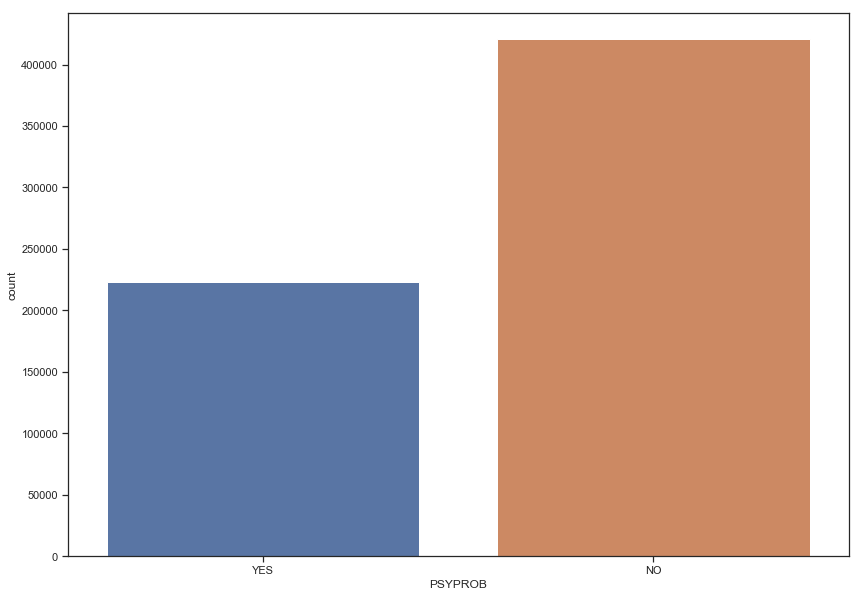

In [38]:
#Psychological problem?

sns.countplot(x="PSYPROB", hue="REASON",data=rehabclean)

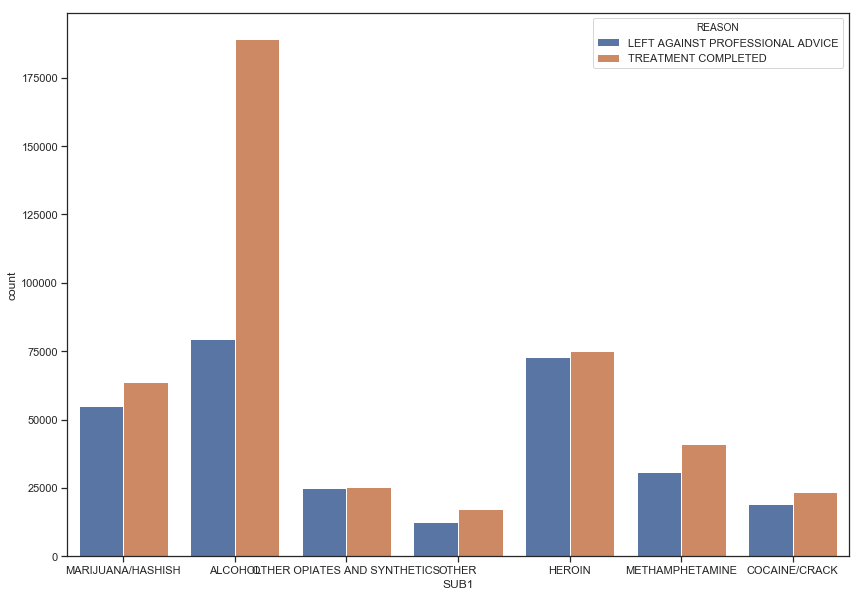

In [50]:
#SUB1?
#Data is much too sparse, let's try to recategorize to paint a better picture.
rehabclean.loc[rehabclean['SUB1'].value_counts()[rehabclean['SUB1']].values < 10000,'SUB1'] = "OTHER"
sns.countplot(x="SUB1", hue="REASON",data=rehabclean)
rehabclean.loc[rehabclean['SUB2'].value_counts()[rehabclean['SUB2']].values < 10000,'SUB2'] = "OTHER"

If the patient has an addiction to alcohol, they seem to be able to complete rehab at a muc higher rate than more extreme drugs.

In [ ]:
#Age?
sns.countplot(x="AGE", hue="REASON", data=rehabclean)

In [ ]:
#RACE?
sns.countplot(x="RACE", hue="REASON", data=rehabclean)

In [ ]:
#GENDER?
sns.countplot(x="GENDER", hue="REASON", data=rehabclean)

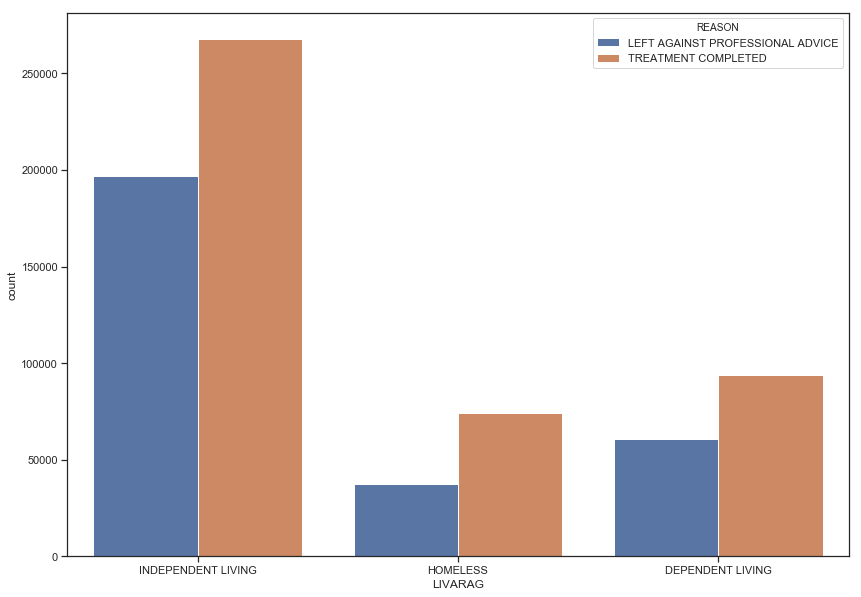

In [39]:
#HOMELESSNESS?
sns.countplot(x="LIVARAG", hue="REASON", data=rehabclean)

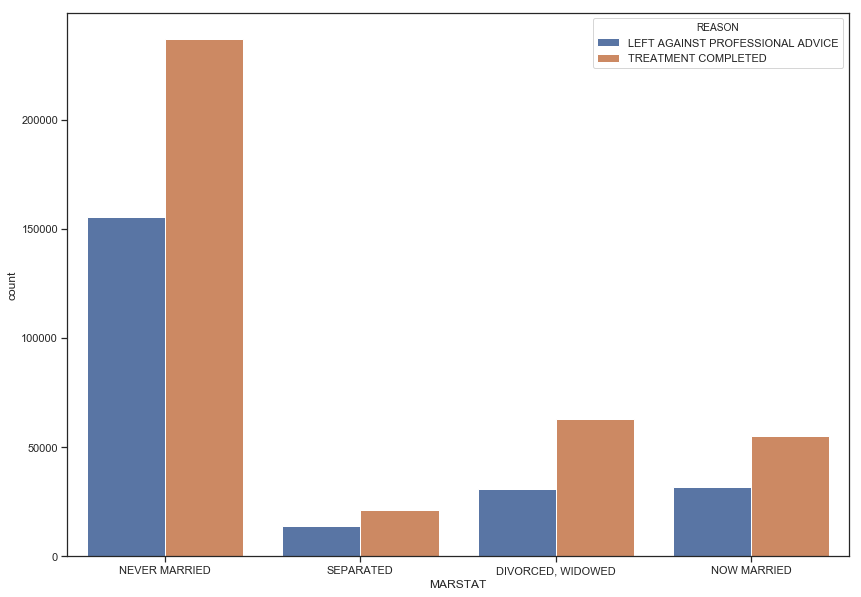

In [40]:
#MARSTAT?
sns.countplot(x="MARSTAT", hue="REASON", data=rehabclean)

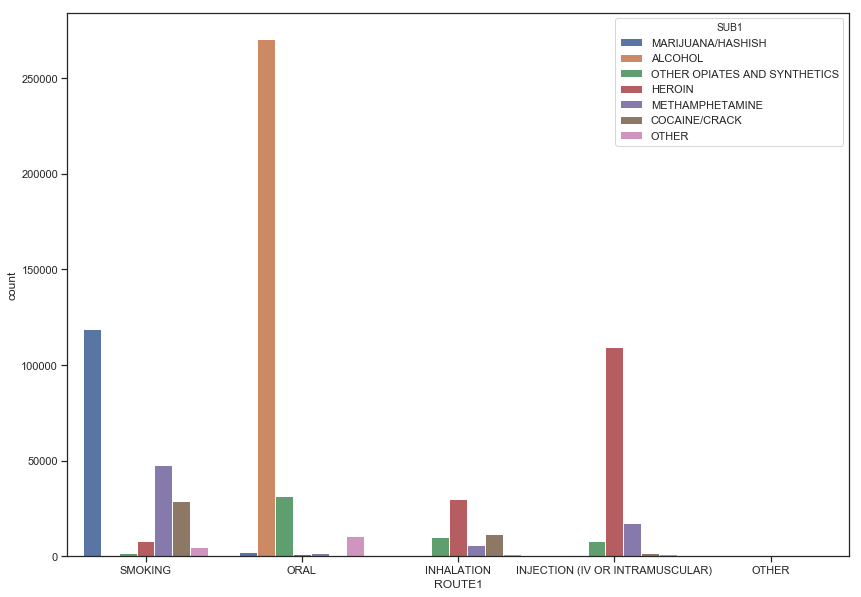

In [44]:
#MARSTAT?
sns.countplot(x="ROUTE1", hue="SUB1", data=rehabclean)

## Missing Value Imputation

In [16]:
#How many missing values are in each column? What is the proportion?
missing = ((rehabclean.isnull().sum()/len(rehabclean))*100).to_dict()
missingsort = sorted(missing.items(),key=lambda kv: kv[1])

In [17]:
missingsort

[('AGE', 0.0),
 ('GENDER', 0.0),
 ('RACE', 0.0),
 ('ETHNIC', 0.0),
 ('EDUC', 0.0),
 ('EMPLOY', 0.0),
 ('VET', 0.0),
 ('LIVARAG', 0.0),
 ('ARRESTS', 0.0),
 ('STFIPS', 0.0),
 ('CBSA', 0.0),
 ('REGION', 0.0),
 ('DIVISION', 0.0),
 ('SERVSETD', 0.0),
 ('METHUSE', 0.0),
 ('REASON', 0.0),
 ('LOS', 0.0),
 ('PSOURCE', 0.0),
 ('NOPRIOR', 0.0),
 ('SUB1', 0.0),
 ('ROUTE1', 0.0),
 ('FREQ1', 0.0),
 ('FRSTUSE1', 0.0),
 ('SUB2', 0.0),
 ('NUMSUBS', 0.0),
 ('ALCFLG', 0.0),
 ('COKEFLG', 0.0),
 ('MARFLG', 0.0),
 ('HERFLG', 0.0),
 ('OPSYNFLG', 0.0),
 ('MTHAMFLG', 0.0),
 ('BENZFLG', 0.0),
 ('OTHERFLG', 0.0),
 ('ALCDRUG', 0.0),
 ('PSYPROB', 11.87065229591627),
 ('MARSTAT', 16.760613120381954),
 ('SUB3', 18.44329950530964),
 ('PRIMINC', 33.40775133528071),
 ('DAYWAIT', 40.33369013822311),
 ('FRSTUSE2', 41.5753437783174),
 ('ROUTE2', 43.12155913698844),
 ('FREQ2', 43.39942892966746),
 ('HLTHINS', 59.06745254996866),
 ('PREG', 67.58915787658201),
 ('DSMCRIT', 68.93771610193852),
 ('DETNLF', 69.5595695345202),
 

In [11]:
#For features with less than 10% of missing values, append the to a list.
autoimputelist = []

for i in missingsort:
    if i[1] > 0 and i[1] < 10:
        autoimputelist.append(i[0])

In [ ]:
#For those feature columns, replace with the most common label.
for column in autoimputelist:
    mode = rehabclean[str(column)].value_counts().idxmax()
    rehabclean[str(column)].fillna(mode,inplace=True)

In [15]:
#For features with less than 10% of missing values, drop from dataset.

rehabclean = rehabclean.dropna(subset=autoimputelist)

In [52]:
#Produce a new list of missing values.
missing = ((rehabclean.isnull().sum()/len(rehabclean))*100).to_dict()
missingsort = sorted(missing.items(),key=lambda kv: kv[1])

largemissing = []

for col in missingsort:
    if col[1]>0:
        print(col)
        largemissing.append(col[0])

('PSYPROB', 11.87065229591627)
('MARSTAT', 16.760613120381954)
('SUB3', 18.44329950530964)
('PRIMINC', 33.40775133528071)
('DAYWAIT', 40.33369013822311)
('FRSTUSE2', 41.5753437783174)
('ROUTE2', 43.12155913698844)
('FREQ2', 43.39942892966746)
('HLTHINS', 59.06745254996866)
('PREG', 67.58915787658201)
('DSMCRIT', 68.93771610193852)
('DETNLF', 69.5595695345202)
('PRIMPAY', 70.06000892468496)
('DETCRIM', 73.42866685465083)
('IDU', 78.64741745350814)
('FRSTUSE3', 78.95252669876997)
('ROUTE3', 79.48965037683524)
('FREQ3', 79.62625828476315)


In [53]:
#Are these columns worth imputing? Let's see how well they relate to the class label.

#Perform a chi-squared test for PSYPROB on REASON.
contingence = pd.crosstab(rehabclean['PSYPROB'],rehabclean['REASON'])

chi2_contingency(contingence)

#The p-value is 0, suggesting that there might be a relationship.

#What about the other columns?
for col in largemissing:
    cont = pd.crosstab(rehabclean[col],rehabclean['REASON'])
    val,pval,dof,exp = chi2_contingency(cont)
    print(str(col) + " : " + str(round(pval,2)))

PSYPROB : 0.0
MARSTAT : 0.0
SUB3 : 0.0
PRIMINC : 0.0
DAYWAIT : 0.0
FRSTUSE2 : 0.0
ROUTE2 : 0.0
FREQ2 : 0.0
HLTHINS : 0.0
PREG : 0.0
DSMCRIT : 0.0
DETNLF : 0.0
PRIMPAY : 0.0
DETCRIM : 0.0
IDU : 1.0
FRSTUSE3 : 0.0
ROUTE3 : 0.0
FREQ3 : 0.0


Nearly all of these columns are statistically significant - will need to determine how to impute these.

### Feature Recategorization

In [ ]:
#Length of stay variable is sparse, must impute manually.
#LOS < 30 is sparse, and is categorical, recombine into <30 days.
LOSrecode = list(range(1,31))
LOSrecode = list(map(str,LOSrecode))
rehabclean['LOS'] = rehabclean['LOS'].replace(LOSrecode,'LESS THAN 30')

#Replace missing values in LOS with most common.
LOSmode = rehabclean['LOS'].value_counts().idxmax()
rehabclean['LOS'].fillna(LOSmode, inplace=True)

In [ ]:
#Daywait is sparse, let's recode.
rehabclean['DAYCAT'] = 'No Wait'
rehabclean['DAYCAT'][rehabclean['DAYWAIT'] == 0] = 'No Wait'
rehabclean['DAYCAT'][rehabclean['DAYWAIT'] > 0] = 'More than 0 days'

In [ ]:
#pd.crosstab(rehabclean['DAYWAIT'],rehabclean['REASON'])

#sns.catplot(x=rehabclean['REASON'].values, y=rehabclean["DAYWAIT"].values, kind="box", data=rehabclean)

#daytest = rehabclean['DAYWAIT'].dropna()

sns.barplot(rehabclean['DAYCAT'])

### Preliminary Model Testing

There are about 17 features that have a high amount of missing values. Let's try running a model without
these features to test how well it performs.

In [54]:
#There are about 17 features that have a high amount of missing values. Let's try running a model without
#these features to test how well it performs.

cleanmissing = ((rehabclean.isnull().sum()/len(rehabclean))*100).to_dict()
cleanmissingsort = sorted(cleanmissing.items(),key=lambda kv: kv[1])

dropfeatures = []

for i in cleanmissingsort:
    if i[1]>0:
        dropfeatures.append(i[0])

#Drop the columns.
rehabtest = rehabclean.drop(dropfeatures,1)

#Drop the census data, except for region.
rehabtest = rehabtest.drop(['STFIPS','CBSA','REGION'],1)

In [55]:
rehabtest.columns

Index(['AGE', 'GENDER', 'RACE', 'ETHNIC', 'EDUC', 'EMPLOY', 'VET', 'LIVARAG',
       'ARRESTS', 'DIVISION', 'SERVSETD', 'METHUSE', 'REASON', 'LOS',
       'PSOURCE', 'NOPRIOR', 'SUB1', 'ROUTE1', 'FREQ1', 'FRSTUSE1', 'SUB2',
       'NUMSUBS', 'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG', 'OPSYNFLG',
       'MTHAMFLG', 'BENZFLG', 'OTHERFLG', 'ALCDRUG'],
      dtype='object')

#### Encoding section:

In [58]:
#Manual encoding of the columns.

#Ordinal/binary variables.
def recat(colnames):
    for col in colnames:
        rehabtest[col] = rehabtest[col].astype('category')
        rehabtest[col] = rehabtest[col].cat.codes

recat(['AGE','EDUC','ARRESTS','NOPRIOR','FREQ1','FRSTUSE1','GENDER','ALCFLG','COKEFLG','MARFLG','HERFLG',
       'OPSYNFLG','MTHAMFLG','BENZFLG','OTHERFLG','ALCDRUG'])

#recat(['AGE','EDUC','ARRESTS','NOPRIOR','FREQ1','FRSTUSE1','GENDER','ALCFLG','COKEFLG','MARFLG','HERFLG',
#       'OPSYNFLG','MTHAMFLG','BENZFLG','OTHERFLG','ALCDRUG','PSYPROB'])

In [59]:
#One hot encode multicategory.
rehabtest = pd.get_dummies(rehabtest,columns=['RACE','ETHNIC','EMPLOY','VET',
                                                     'LIVARAG','DIVISION','SERVSETD','METHUSE',
                                                     'LOS','PSOURCE','SUB1','ROUTE1','SUB2'])

In [60]:
rehabtest.dtypes

AGE                                                      int8
GENDER                                                   int8
EDUC                                                     int8
ARRESTS                                                  int8
REASON                                                 object
NOPRIOR                                                  int8
FREQ1                                                    int8
FRSTUSE1                                                 int8
NUMSUBS                                                 int64
ALCFLG                                                   int8
COKEFLG                                                  int8
MARFLG                                                   int8
HERFLG                                                   int8
OPSYNFLG                                                 int8
MTHAMFLG                                                 int8
BENZFLG                                                  int8
OTHERFLG

### Dimensionality Reduction

Could we reduce this dataset into two components? Will it mean anything?

In [66]:
X=rehabtest.iloc[:,rehabtest.columns != 'REASON']
Y=rehabtest.iloc[:,rehabtest.columns == 'REASON']

In [ ]:
# set up a PCA learner
pca = PCA(n_components = 2)
eigenbasis = pca.fit(X)
rehab2d = eigenbasis.transform(X)

In [ ]:
# let's also look at how much of the total variance we were able to cover with 2 dimensions
print('percentage of variance explained:', sum(pca.explained_variance_ratio_))

In [ ]:
#Utilizer a TSNE learner.

td = TSNE(n_components=2).fit_transform(X)

In [ ]:
#Split this into features and labels, and run a test algorithm.

PCAlabels = Y.values

X_train, X_test, y_train, y_test = train_test_split(rehab2d,PCAlabels,test_size=.3)

#Train on a neural network.
neural = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(15,),random_state=1)
neural = neural.fit(X_train,y_train)
y_pred = neural.predict(X_test)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Train on a random forest.

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

### Feature Selection

In [ ]:
#Use recursive feature elimination.
#Create a baseline classifier from a robust model, used ot evaluate a subset of attributes.

rf = LogisticRegression()
#rf = RandomForestClassifier(n_estimators=10)

#Create the RFE model and select 3 attributes.
rfe = RFE(rf, n_features_to_select=5)
rfe = rfe.fit(X_train,y_train)

#Summarise the selection of the attributes.
print(rfe.support_)
print sorted(zip(map(lambda x:round(x,4),rfe.ranking_),rehabtest.columns)

In [ ]:
print(sorted(zip(map(lambda x:round(x,4),rfe.ranking_),rehabtest.columns)))

### Baseline Models

In [ ]:
#Split the data into features and labels, and split into training and testing data.

X=rehabtest.iloc[:,rehabtest.columns != 'REASON']
Y=rehabtest.iloc[:,rehabtest.columns == 'REASON']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3)

In [ ]:
#Train on a random forest.

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Train on a decision tree.
tree = tree.DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Train on a neural network.
neural = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(15,),random_state=1)
neural = neural.fit(X_train,y_train)
y_pred = neural.predict(X_test)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Adaboost on full set.

ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)

from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Train on SVM.
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Train on kNN.
neigh = KNeighborsClassifier(n_neighbors=3)
neigh = neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Train on a random forest with only the top 10 features.
rehabred = rehabtest[['SERVSETD_AMBULATORY, INTENSIVE OUTPATIENT','FRSTUSE1', 
                     'AGE','FREQ1','NOPRIOR','REASON','EDUC','ARRESTS','LIVARAG_HOMELESS','SUB2','ETHNIC_MEXICAN']]

In [ ]:
Xred=rehabred.iloc[:,rehabred.columns != 'REASON']
Yred=rehabred.iloc[:,rehabred.columns == 'REASON']

X_trainred, X_testred, y_trainred, y_testred = train_test_split(Xred,Yred,test_size=.3)

In [ ]:
#Train on a random forest.
clf2=RandomForestClassifier(n_estimators=100)
clf2.fit(X_trainred,y_trainred)
y_predred=clf2.predict(X_testred)

print('Accuracy:',metrics.accuracy_score(y_testred,y_predred))

Wow, this actually made it worse.

In [ ]:
#Adaboost

ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_trainred,y_trainred)
y_predred=ada.predict(X_testred)

from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_testred,y_predred))

In [ ]:
confusion_matrix(y_test,y_pred)